In [1]:
import tellurium as te
import matplotlib.pyplot as plt
import libsbml


# function for plotting the phase portraits of a given model
# specify metabolites_list to analyze a specific set of metabolites
def plot_phase_portraits(model, model_name, simulation, metabolites_list, outpath):
    model_phase_portraits = {}
    used_metabolites = []
    for metabolite in metabolites_list:
        metabolite_simulation_identifier = '[' + metabolite + ']'
        model_phase_portraits[metabolite] = simulation[metabolite_simulation_identifier]
    for i in metabolites_list:
        for j in metabolites_list:
            if i != j and j not in used_metabolites:
                i_name = model.getSpecies(i).getName()
                j_name = model.getSpecies(j).getName()
                plt.figure()
                plt.title("Comparison between {} and {} [{}]".format(i_name, j_name, model_name))
                plt.xlabel(i_name)
                plt.ylabel(j_name)
                plt.plot(model_phase_portraits[i], model_phase_portraits[j])
                plt.savefig(outpath + "_" + i_name + "_vs_" + j_name + ".png")
                plt.show()
        used_metabolites.append(i)


def plot_pool_transient(simulation, title, phase_tuples, outpath):
    pool = 0
    for coefficient, metabolite in phase_tuples:
        metabolite_simulation_identifier = '[' + metabolite + ']'
        pool += coefficient * simulation[metabolite_simulation_identifier]
    plt.figure()
    plt.title(title)
    plt.xlabel('t')
    plt.plot(pool)
    plt.savefig(outpath)
    plt.show()


def plot_pool_phase_portrait(simulation, title, phase_tuple1, name1, phase_tuple2, name2, outpath):
    pool1 = 0
    for coefficient, metabolite in phase_tuple1:
        metabolite_simulation_identifier = '[' + metabolite + ']'
        pool1 += coefficient * simulation[metabolite_simulation_identifier]

    pool2 = 0
    for coefficient, metabolite in phase_tuple2:
        metabolite_simulation_identifier = '[' + metabolite + ']'
        pool2 += coefficient * simulation[metabolite_simulation_identifier]
    plt.figure()
    plt.title(title)
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.plot(pool1, pool2)
    plt.savefig(outpath)
    plt.show()


In [ ]:
asansm_path = 'xml/iPAE1146_Amino_sugar_and_nucleotide_sugar_metabolism_fbc_squeezed_with_boundaries.xml'
pm_path = 'fbc/iPAE1146_Pyrimidine_metabolism_fbc_squeezed.xml'
lb_path = 'fbc/iPAE1146_Lipopolysaccharide_biosynthesis_fbc_squeezed.xml'
combined_model_path = 'fbc/iPAE1146_Combined_Subsystems_fbc_squeezed.xml'

asansm_libsbml_doc = libsbml.readSBML(asansm_path)
asansm_libsbml = asansm_libsbml_doc.getModel()
asansm_model = te.loadSBMLModel(asansm_path)
pm_model = te.loadSBMLModel(pm_path)
lb_model = te.loadSBMLModel(lb_path)
combined_model = te.loadSBMLModel(combined_model_path)


In [ ]:

asansm_model.reset()
asansm_simulation = asansm_model.simulate(0, 1000, 1000)
# asansm_model.plot(asansm_simulation)

# asansm_model.getSteadyStateValues()
asansm_phase_metabolites = ['M_cpd00003_c', 'M_cpd17092_c',
                            'M_cpd00004_c']  # insert the metabolites to be considered in the phase portraits

# plot_phase_portraits(asansm_libsbml, "ASANSM", asansm_simulation, asansm_phase_metabolites, "plots/asansm")
asansm_phase_pools = [(-2, 'M_cpd00003_c'),
                      (-1, 'M_cpd00004_c')]  # insert the metabolites to be considered in the phase portraits

plot_pool_transient(asansm_simulation, "Pool: -2A-1B [ASANSM]", asansm_phase_pools, "plots/asansm_pool.png")

pool1 = asansm_phase_pools
pool2 = [(3, 'M_cpd17092_c'), (1, 'M_cpd00004_c')]
plot_pool_phase_portrait(asansm_simulation, "P1 vs. P2 [ASANSM]", pool1, "P1", pool2, "P2", "plots/asansm_p1vsp2.png")

#TODO: T=0 and T->inf annotations

In [ ]:
pm_model.reset()
pm_simulation = pm_model.simulate(0,100,1000)
pm_model.plot(pm_simulation)

pm_model.getSteadyStateValues()

# plot_phase_portraits(pm_model, pm_simulation)

In [ ]:
lb_model.reset()
lb_simulation = lb_model.simulate(0,100,1000)
lb_model.plot(lb_simulation)

lb_model.getSteadyStateValues()

# plot_phase_portraits(lb_model, lb_simulation)

In [ ]:
combined_model.reset()
combined_model_simulation = combined_model.simulate(0,100,1000)
combined_model.plot(combined_model_simulation)

combined_model.getSteadyStateValues()

# plot_phase_portraits(combined_model, combined_model_simulation)

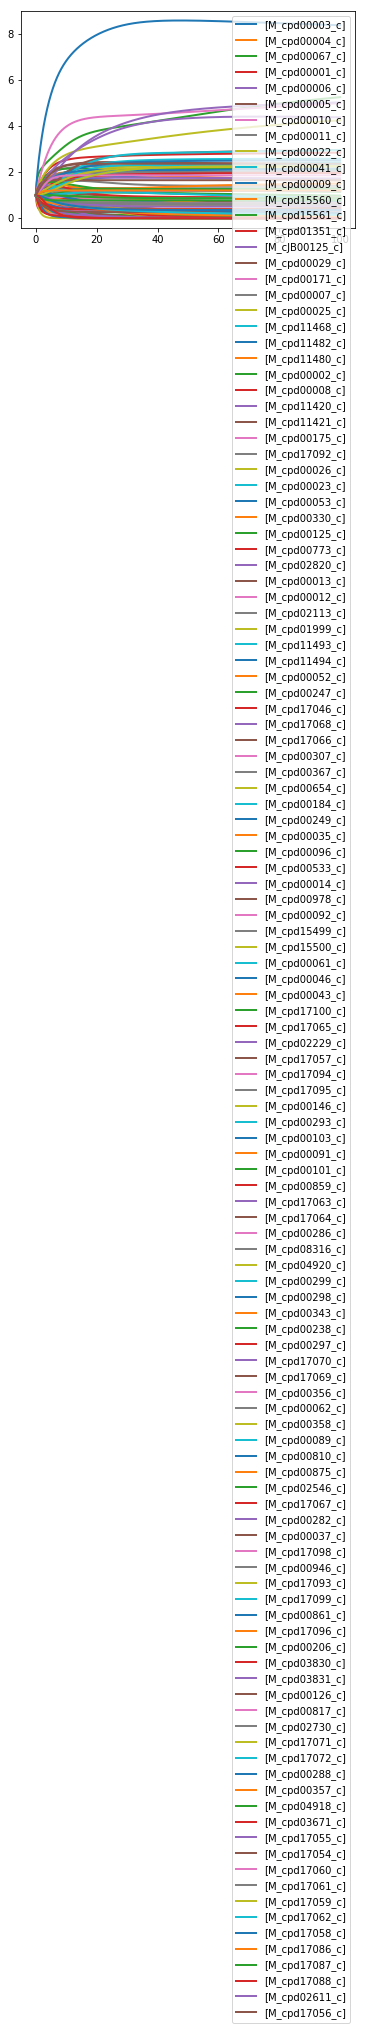

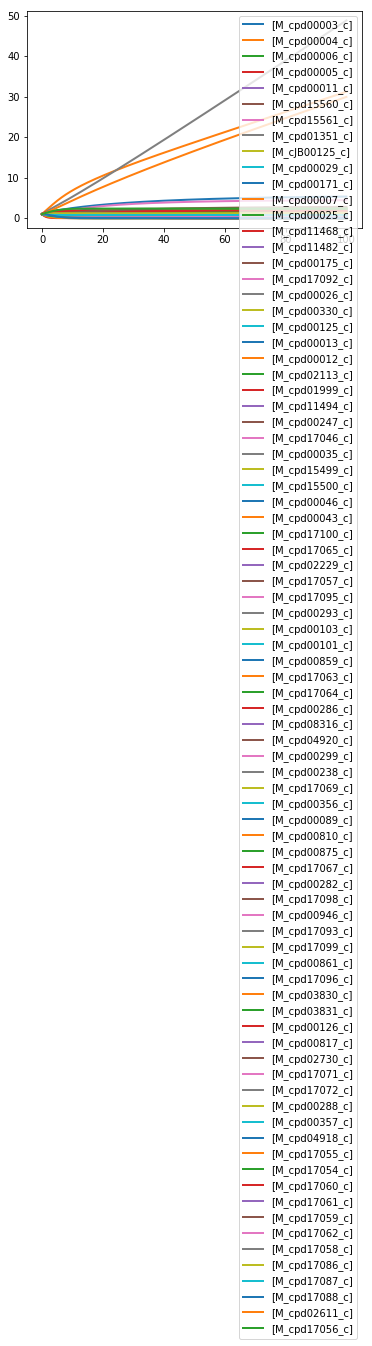

// Created by libAntimony v2.9.4
model *doc0()

  // Compartments and Species:
  compartment c, e;
  species M_cpd00003_c in c, M_cpd00004_c in c, $M_cpd00067_c in c, $M_cpd00001_c in c;
  species M_cpd00006_c in c, M_cpd00005_c in c, $M_cpd00010_c in c, M_cpd00011_c in c;
  species $M_cpd00022_c in c, $M_cpd00041_c in c, $M_cpd00009_c in c, M_cpd15560_c in c;
  species M_cpd15561_c in c, M_cpd01351_c in c, M_cJB00125_c in c, M_cpd00029_c in c;
  species M_cpd00171_c in c, M_cpd00007_c in c, M_cpd00025_c in c, M_cpd11468_c in c;
  species M_cpd11482_c in c, $M_cpd11480_c in c, $M_cpd00002_c in c, $M_cpd00008_c in c;
  species $M_cpd11420_c in c, $M_cpd11421_c in c, M_cpd00175_c in c, M_cpd17092_c in c;
  species M_cpd00026_c in c, $M_cpd00023_c in c, $M_cpd00053_c in c, M_cpd00330_c in c;
  species M_cpd00125_c in c, $M_cpd00773_c in c, $M_cpd02820_c in c, M_cpd00013_c in c;
  species M_cpd00012_c in c, M_cpd02113_c in c, M_cpd01999_c in c, $M_cpd11493_c in c;
  species M_cpd11494_c in

In [4]:
combined_model_path = 'fbc/iPAE1146_Combined_Subsystems_fbc_squeezed.xml'
combined_model = te.loadSBMLModel(combined_model_path)
combined_model_simulation = combined_model.simulate(0,100,1000)
combined_model.plot(combined_model_simulation)

combined_model_path = 'xml/iPAE1146_Combined_Subsystems_fbc_squeezed_with_boundaries.xml'
combined_model = te.loadSBMLModel(combined_model_path)
combined_model_simulation = combined_model.simulate(0,100,1000)
combined_model.plot(combined_model_simulation)

print(combined_model.getAntimony())